##### Objective:
*****  COVID-19 has profound disruptive effects on the global ecconmy.It reduces number of workers in the workforce,and therefore reduces the global supply of goods. Travel was banned. Schools have been closed. Stock market has been cracked. People are panic. 

***** This study uses datasets from Kaggal, working in hope it can shed light into answer some questions. How it starts; when it happened, who are affected. Which country got worse, which age groups are vulnerable to the disease. Who are suceptible to the disease: men or women?...etc, its trending on China, and other countries such as Italy, South Korea, Spain, and the USA.

##### Import library packages and upload the files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

##### Upload files + verify columns + clean data

In [3]:
df = pd.read_csv('COVID19_line_list_data.csv')
df.head(2)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop meaningless/unneeded columns
df.drop(['Unnamed: 3','Unnamed: 21','Unnamed: 22','Unnamed: 23', 
                 'Unnamed: 24','Unnamed: 25','Unnamed: 26'], axis=1,inplace = True)

In [9]:
df.head(2)

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...


In [84]:
df.dropna().head(2)

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
241,242,6.0,1/28/2020,new confirmed COVID-19 patient in Japan: 1/28-...,Nara Prefecture,Japan,male,65.0,1/14/2020,0.0,1/17/2020,01/08/20,1/16/2020,0,0.0,0,0,"cough, chills, joint pain",Kyodo News,https://english.kyodonews.net/news/2020/01/e8f...
243,244,8.0,1/29/2020,new confirmed COVID-19 patient in Japan: femal...,Osaka Prefecture,Japan,female,45.0,1/20/2020,0.0,1/20/2020,01/12/20,1/17/2020,0,0.0,0,0,"fever, cough",NHK World-Japan,https://www3.nhk.or.jp/nhkworld/en/news/202001...


Text(0.5, 1.0, 'Age Distribution')

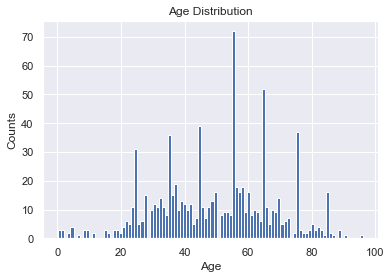

In [67]:
# Plot age distribution in patients with coronavirus
df['age'].hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Distribution')

In [75]:
print(f" The average age of patients with Coronavirus is {round(df['age'].mean())} years old")
print(f" The youngest  patients with Coronavirus is {round(df['age'].min())} years old")
print(f" The oldest patients with Coronavirus is {round(df['age'].max())} years old")

 The average age of patients with Coronavirus is 49 years old
 The youngest  patients with Coronavirus is 0 years old
 The oldest patients with Coronavirus is 96 years old


##### Keys Takeaway:
*** The average age of patients with Coronavirus is 49 years old.

*** The youngest patient(s) with Coronavirus are infant(s) - o years old

*** The oldest patients are 96 years old

Text(0.5, 1.0, 'Gender Distribution')

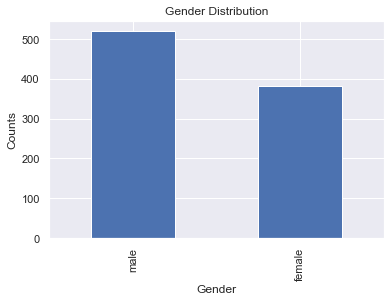

In [65]:
# plot gender distribution between gender
df['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Gender Distribution')

##### Note: Men are succeptible to virus than female

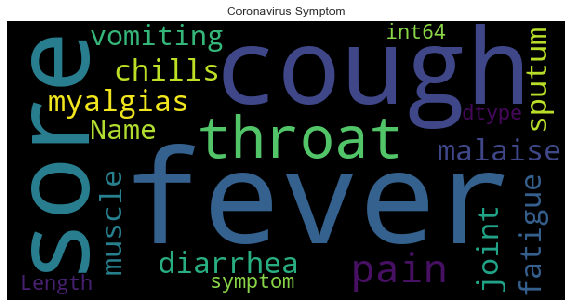

In [97]:
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = df['symptom'].value_counts() 
plt.figure(figsize=(10,6))
wordcloud=WordCloud(background_color='black',mode="RGB", width=600 , height=300).generate(str(text))
plt.title("Coronavirus Symptom")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##### Coronavirus Symptom:
    * Cough
    * Fever
    * Sore throat
    * Vomiting
    * Diarrhea
    * Chills
    * Fatigue
    * Sputum
    * Myalgias Muscle
    * Pain

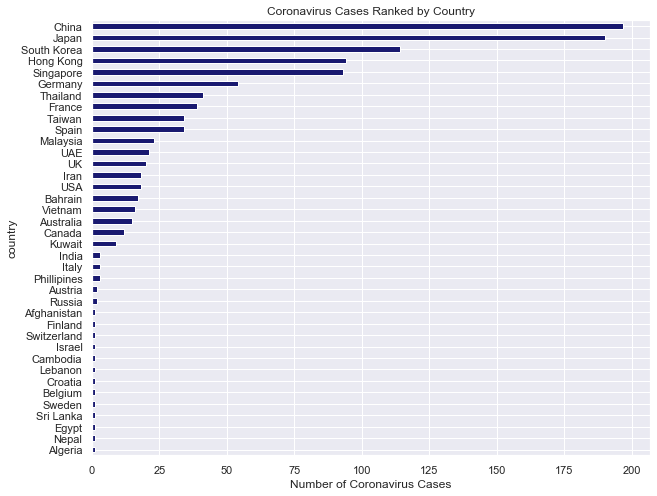

In [66]:
# Plot number of Coronavirus cases vs Countries
fig = plt.figure(figsize=(10,8))
df['country'].value_counts().sort_values().plot.barh(color='midnightblue')

plt.title('Coronavirus Cases Ranked by Country')
plt.xlabel('Number of Coronavirus Cases')
plt.ylabel('country')
plt.show()

In [20]:
df1 = pd.read_csv('COVID19_open_line_list.csv')
df1.head(2)

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.64696,117.7166,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.77863,117.3319,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df1.drop(['data_moderator_initials','Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38', 
                 'Unnamed: 39','Unnamed: 40','Unnamed: 41',
         'Unnamed: 42','Unnamed: 43','Unnamed: 44'], axis=1,inplace = True)

In [19]:
df1.head(2)

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.64696,117.7166,admin3,...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.77863,117.3319,admin3,...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111


In [29]:
df2 = pd.read_csv('covid_19_data.csv')
df2.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0


In [36]:
### Create 'Active' column by subtract 'Deaths' and 'Recovered' from 'Confirmed'
df2['Active'] = df2['Confirmed'] - df2['Deaths'] - df2['Recovered']
df2.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0


In [44]:
df2.dropna().head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0


#### Look for a Trend in various situations: Confirmed, Deaths, Recovered, ActiveCases

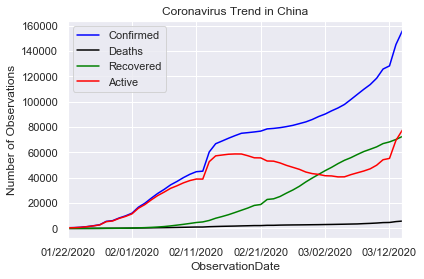

In [58]:
df2.plot(x="ObservationDate", y=["Confirmed", "Deaths","Recovered", "Active"], color = ['blue','black','green','red'])
plt.title('Coronavirus Trend in China')
plt.ylabel('Number of Observations')
plt.show()

##### Keys Takeaway:
    1. Number of confirmed cases continue to grow from 01/22/20 to middle of March. It is stablized around 2/21/20 and increases sharply after 03/12/20. Continuous increasing of confirmed cases indicates an uncontrollabe spread of Coronavirus
    2. Number of Deaths are steadily increasing from 1/22/20 - 3/12/20. It increases even when the confirmed cases are stable. At this period, recovered cases are less, thus increasing deaths is unavoidable.
    3. Number of recovered cases are increasing gradually indicates effective ways of fighting virus. 
    4. Active cases went down sharply from 2/21 - 3/05/20.

In [108]:
# Calculating Death, Active, and Recovery Percentage
active_percentage = round((df2['Active'].sum())/(df2['Confirmed'].sum()))* 100
recovery_percentage = round((df2['Recovered'].sum())/(df2['Confirmed'].sum()))* 100
death_percentage = round((df2['Deaths'].sum())/(df2['Confirmed'].sum()))* 100
print(f"In China Active Cases and Recovery Percentage is {active_percentage}, {recovery_percentage} respectively and Death Rate is {death_percentage}.")

In China Active Cases and Recovery Percentage is 100.0, 0.0 respectively and Death Rate is 0.0.


In [8]:
df3 = pd.read_csv('time_series_covid_19_confirmed.csv')
df3.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0,101.0,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0,138.0,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773


In [9]:
df4 = pd.read_csv('time_series_covid_19_deaths.csv')
df4.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0,101.0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0,138.0,0,0,0,0,0,0,...,6,6,6,6,10,10,15,16,19,22


In [10]:
df5 = pd.read_csv('time_series_covid_19_recovered.csv')
df5.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0,101.0,0,0,0,0,2,2,...,31,31,31,31,31,33,34,34,35,35
1,NaN,Japan,36.0,138.0,0,0,0,0,1,1,...,43,46,76,76,76,101,118,118,118,118
